<a href="https://colab.research.google.com/github/DikshantBadawadagi/Encryption-Algorithms/blob/main/Avalanche-Effect%20in%20Knapsack-Cryptosystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

def mod_inverse(a, m):
    a = a % m
    for x in range(1, m):
        if (a * x) % m == 1:
            return x
    return None

def generate_key():
    S = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 4194304, 8388608, 16777216, 33554432]
    m = 2**27
    w = 17


    P = [(w * s) % m for s in S[:26]]
    return S[:26], P, m, w

def encrypt(message, P):
    ciphertext = []
    for char in message:
        if char.isalpha():
            char = char.upper()
            index = ord(char) - ord('A')
            if index < 0 or index >= len(P):
                raise ValueError(f"Character '{char}' is out of range for the binary vector.")

            binary_vector = [0] * len(P)
            binary_vector[index] = 1

            c = sum(P[i] for i in range(len(P)) if binary_vector[i] == 1)
            ciphertext.append(c)
    return ciphertext

def decrypt(ciphertext, S, w, m):
    w_inv = mod_inverse(w, m)
    if w_inv is None:
        raise ValueError("Modular inverse does not exist.")

    decrypted_binary = []
    for c in ciphertext:
        c_prime = (c * w_inv) % m
        binary_vector = []

        for s in reversed(S):
            if c_prime >= s:
                c_prime -= s
                binary_vector.append(1)
            else:
                binary_vector.append(0)

        decrypted_binary.append(binary_vector[::-1])

    plaintext = ''
    for binary in decrypted_binary:
        index = binary.index(1) if 1 in binary else -1
        if index != -1:
            plaintext += chr(index + ord('A'))
        else:
            plaintext += '?'

    return plaintext


if __name__ == "__main__":
    S, P, m, w = generate_key()
    message = "Dikshant"


    ciphertext = encrypt(message, P)
    print("Original Plaintext:", message)
    print("Ciphertext:", ciphertext)


    decrypted_text = decrypt(ciphertext, S, w, m)
    print("Decrypted Text:", decrypted_text)


Original Plaintext: Dikshant
Ciphertext: [136, 4352, 17408, 4456448, 2176, 17, 139264, 8912896]
Decrypted Text: DIKSHANT


In [12]:
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

def mod_inverse(a, m):
    a = a % m
    for x in range(1, m):
        if (a * x) % m == 1:
            return x
    return None

def generate_key():
    # Powers of 2 for 36 elements (0-9, A-Z)
    S = [1 << i for i in range(36)]
    m = 2**27
    w = 17

    P = [(w * s) % m for s in S]  # Generate P for all 36 characters
    return S, P, m, w

def encrypt(message, P):
    ciphertext = []
    for char in message:
        if char.isalnum():  # Check if character is alphanumeric
            if char.isdigit():
                index = ord(char) - ord('0') + 26  # Map '0'-'9' to 26-35
            else:
                index = ord(char.upper()) - ord('A')  # Map 'A'-'Z' to 0-25

            binary_vector = [0] * len(P)
            binary_vector[index] = 1

            c = sum(P[i] for i in range(len(P)) if binary_vector[i] == 1)
            ciphertext.append(c)
    return ciphertext

def decrypt(ciphertext, S, w, m):
    w_inv = mod_inverse(w, m)
    if w_inv is None:
        raise ValueError("Modular inverse does not exist.")

    plaintext = ''
    for c in ciphertext:
        c_prime = (c * w_inv) % m
        binary_vector = [0] * len(S)

        for i in range(len(S) - 1, -1, -1):
            if c_prime >= S[i]:
                c_prime -= S[i]
                binary_vector[i] = 1

        index = binary_vector.index(1) if 1 in binary_vector else -1
        if index != -1:
            if index < 26:
                plaintext += chr(index + ord('A'))  # Map 0-25 to A-Z
            else:
                plaintext += chr(index - 26 + ord('0'))  # Map 26-35 to 0-9
        else:
            plaintext += '?'

    return plaintext

if __name__ == "__main__":
    S, P, m, w = generate_key()
    message = "Dikshant123"

    ciphertext = encrypt(message, P)
    print("Original Plaintext:", message)
    print("Ciphertext:", ciphertext)

    decrypted_text = decrypt(ciphertext, S, w, m)
    print("Decrypted Text:", decrypted_text)


Original Plaintext: Dikshant123
Ciphertext: [136, 4352, 17408, 4456448, 2176, 17, 139264, 8912896, 0, 0, 0]
Decrypted Text: DIKSHANT???


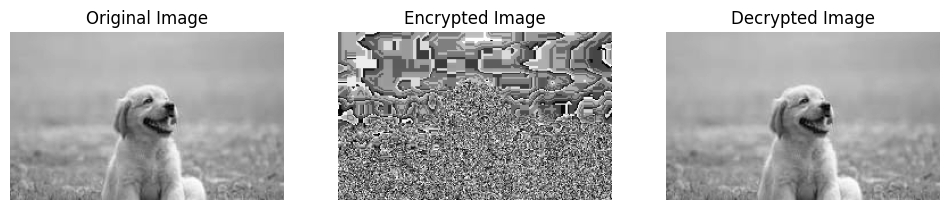

In [15]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Merkle-Hellman functions
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

def mod_inverse(a, m):
    a = a % m
    for x in range(1, m):
        if (a * x) % m == 1:
            return x
    return None

def generate_key():
    # Expanded superincreasing sequence for 8-bit pixel values (0-255)
    S = [1, 2, 4, 8, 16, 32, 64, 128]
    m = 2**10  # Modulus
    w = 31     # Multiplier (must be coprime to m)

    # Generate public key
    P = [(w * s) % m for s in S]
    return S, P, m, w

def encrypt_pixel(pixel, P):
    # Convert pixel value to binary vector
    binary_vector = [int(x) for x in format(pixel, '08b')]
    # Calculate the ciphertext
    c = sum(P[i] for i in range(len(P)) if binary_vector[i] == 1)
    return c

def decrypt_pixel(c, S, w, m):
    # Compute the modular inverse
    w_inv = mod_inverse(w, m)
    if w_inv is None:
        raise ValueError("Modular inverse does not exist.")

    # Calculate the original sum before encryption
    c_prime = (c * w_inv) % m

    # Recover binary vector using superincreasing sequence
    binary_vector = []
    for s in reversed(S):
        if c_prime >= s:
            c_prime -= s
            binary_vector.append(1)
        else:
            binary_vector.append(0)
    binary_vector = binary_vector[::-1]  # Reverse to original order

    # Convert binary vector back to integer pixel value
    pixel_value = sum([binary_vector[i] * (2**(7 - i)) for i in range(8)])
    return pixel_value

# Image encryption and decryption functions
def encrypt_image(image, P):
    # Convert image to NumPy array with a larger data type to hold the encrypted values
    image_data = np.array(image, dtype=np.int32)
    encrypted_image_data = np.zeros_like(image_data, dtype=np.int32)

    # Encrypt each pixel
    for i in range(image_data.shape[0]):
        for j in range(image_data.shape[1]):
            encrypted_image_data[i, j] = encrypt_pixel(image_data[i, j], P)

    return encrypted_image_data

def decrypt_image(encrypted_image_data, S, w, m):
    # Convert the encrypted image data back to the same data type before decryption
    decrypted_image_data = np.zeros_like(encrypted_image_data, dtype=np.int32)

    # Decrypt each pixel
    for i in range(encrypted_image_data.shape[0]):
        for j in range(encrypted_image_data.shape[1]):
            decrypted_image_data[i, j] = decrypt_pixel(encrypted_image_data[i, j], S, w, m)

    return decrypted_image_data

# Display images side by side
def display_images(original, encrypted, decrypted):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Encrypted Image")
    plt.imshow(encrypted, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Decrypted Image")
    plt.imshow(decrypted, cmap='gray')
    plt.axis('off')

    plt.show()

# Main function
if __name__ == "__main__":
    # Generate Merkle-Hellman keys
    S, P, m, w = generate_key()

    # Open and process the image (use a grayscale image for simplicity)
    image_path = "/content/dog.jfif"  # Change to your image path
    image = Image.open(image_path).convert('L')  # Convert to grayscale ('L' mode)
    original_image_data = np.array(image)

    # Encrypt the image
    encrypted_image_data = encrypt_image(image, P)

    # Decrypt the image
    decrypted_image_data = decrypt_image(encrypted_image_data, S, w, m)

    # Convert encrypted and decrypted data back to images
    encrypted_image = Image.fromarray(encrypted_image_data)
    decrypted_image = Image.fromarray(decrypted_image_data)

    # Display the original, encrypted, and decrypted images
    display_images(original_image_data, encrypted_image_data, decrypted_image_data)


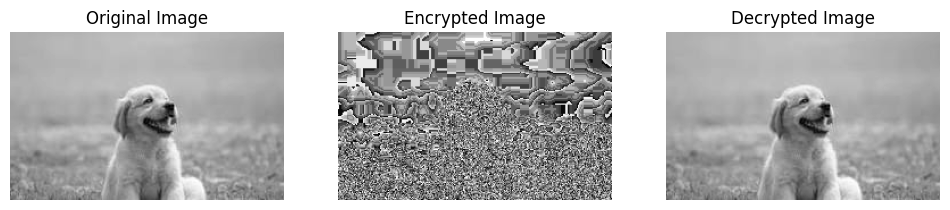

In [18]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Merkle-Hellman functions
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

def mod_inverse(a, m):
    a = a % m
    for x in range(1, m):
        if (a * x) % m == 1:
            return x
    return None

def generate_key():
    # Expanded superincreasing sequence for 8-bit pixel values (0-255)
    S = [1, 2, 4, 8, 16, 32, 64, 128]
    m = 2**10  # Modulus
    w = 29     # Multiplier (must be coprime to m)

    # Generate public key
    P = [(w * s) % m for s in S]
    return S, P, m, w

def encrypt_pixel(pixel, P):
    # Convert pixel value to binary vector
    binary_vector = [int(x) for x in format(pixel, '08b')]
    # Calculate the ciphertext
    c = sum(P[i] for i in range(len(P)) if binary_vector[i] == 1)
    return c

def decrypt_pixel(c, S, w, m):
    # Compute the modular inverse
    w_inv = mod_inverse(w, m)
    if w_inv is None:
        raise ValueError("Modular inverse does not exist.")

    # Calculate the original sum before encryption
    c_prime = (c * w_inv) % m

    # Recover binary vector using superincreasing sequence
    binary_vector = []
    for s in reversed(S):
        if c_prime >= s:
            c_prime -= s
            binary_vector.append(1)
        else:
            binary_vector.append(0)
    binary_vector = binary_vector[::-1]  # Reverse to original order

    # Convert binary vector back to integer pixel value
    pixel_value = sum([binary_vector[i] * (2**(7 - i)) for i in range(8)])
    return pixel_value

# Image encryption and decryption functions
def encrypt_image(image, P):
    # Convert image to NumPy array with a larger data type to hold the encrypted values
    image_data = np.array(image, dtype=np.int32)
    encrypted_image_data = np.zeros_like(image_data, dtype=np.int32)

    # Encrypt each pixel
    for i in range(image_data.shape[0]):
        for j in range(image_data.shape[1]):
            encrypted_image_data[i, j] = encrypt_pixel(image_data[i, j], P)

    return encrypted_image_data

def decrypt_image(encrypted_image_data, S, w, m):
    # Convert the encrypted image data back to the same data type before decryption
    decrypted_image_data = np.zeros_like(encrypted_image_data, dtype=np.int32)

    # Decrypt each pixel
    for i in range(encrypted_image_data.shape[0]):
        for j in range(encrypted_image_data.shape[1]):
            decrypted_image_data[i, j] = decrypt_pixel(encrypted_image_data[i, j], S, w, m)

    return decrypted_image_data

# Display images side by side
def display_images(original, encrypted, decrypted):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Encrypted Image")
    plt.imshow(encrypted, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Decrypted Image")
    plt.imshow(decrypted, cmap='gray')
    plt.axis('off')

    plt.show()

# Main function
if __name__ == "__main__":
    # Generate Merkle-Hellman keys
    S, P, m, w = generate_key()

    # Open and process the image (use a grayscale image for simplicity)
    image_path = "/content/dog.jfif"  # Change to your image path
    image = Image.open(image_path).convert('L')  # Convert to grayscale ('L' mode)
    original_image_data = np.array(image)

    # Encrypt the image
    encrypted_image_data = encrypt_image(image, P)

    # Decrypt the image
    decrypted_image_data = decrypt_image(encrypted_image_data, S, w, m)

    # Convert encrypted and decrypted data back to images
    encrypted_image = Image.fromarray(encrypted_image_data)
    decrypted_image = Image.fromarray(decrypted_image_data)

    # Display the original, encrypted, and decrypted images
    display_images(original_image_data, encrypted_image_data, decrypted_image_data)
